In [3]:
# SGO COMPARISION GRAPH (SPHERE FUNCTION : f(x) = Xi^2, 1<i<n, here f(x) = X1^2 + X2^2)
import random
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

In [4]:
# Input instructions
pop = int(input("Enter the Number of Population : "))
dim = int(input("Enter the Number of Dimension : "))
r1 = int(input("Enter the Range : "))
r2 = int(input())
itr = int(input("Enter the Number of Iteration : "))

In [5]:
# || CUCKOO SEARCH ALGORITHM ||

def CuckooSearch_SPHERE(pop, dim, r1, r2, itr, beta=1.5):

    # Define Objective Function (Sphere Function)
    def objective_Fun(x):
        return np.sum(x ** 2)

    # Initialize Population
    def initial_Population(pop, dim, r1, r2):
        return np.random.uniform(r1, r2, (pop, dim))

    # Calculate Levy Flight
    def Levy_Flight(beta, dim):
        sigma = ((gamma(1 + beta) * np.sin(np.pi * beta / 2) / (
                    gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)))) ** (1 / beta)
        u = np.random.normal(0, sigma, size=dim)
        v = np.random.normal(0, 1, size=dim)
        step = u / np.abs(v) ** (1 / beta)
        return step

    # Search Algorithm
    def CS(objective_Fun, pop, dim, itr, pa=0.25):
        population = initial_Population(pop, dim, r1, r2)
        fitness = np.array([objective_Fun(nest) for nest in population])
        best_solution = population[np.argmin(fitness)]
        best_fitness = np.min(fitness)

        GBest_values = [best_fitness]

        # CS Main Loop
        for i in range(itr):

            # Generate New Solution by Levy Flight
            new_population = np.zeros_like(population)
            for j in range(pop):
                step_size = 0.01 * Levy_Flight(beta, dim)
                new_nest = population[j] + step_size * (population[j] - best_solution)
                new_fitness = objective_Fun(new_nest)
                if new_fitness < fitness[j]:
                    new_population[j] = new_nest
                    fitness[j] = new_fitness
                else:
                    new_population[j] = population[j]

            for j in range(pop):
                if np.random.rand() < pa:
                    new_population[j] = initial_Population(1, dim, r1, r2)

            fitness = np.array([objective_Fun(nest) for nest in new_population])
            current_best_fitness = np.min(fitness)
            if current_best_fitness < best_fitness:
                best_solution = new_population[np.argmin(fitness)]
                best_fitness = current_best_fitness

            # Abandon Egg With Probability (pa) and lay new eggs
            abandon_egg = int(pa * pop)
            abandon_soln = np.random.choice(pop, size=abandon_egg, replace=False)
            population[abandon_soln] = initial_Population(abandon_egg, dim, r1, r2)
            fitness[abandon_soln] = np.array([objective_Fun(nest) for nest in population[abandon_soln]])

            GBest_values.append(best_fitness)
            population = new_population

        return GBest_values

    return CS(objective_Fun, pop, dim, itr, pa=0.25)

fitness_values_CuckooSearch = CuckooSearch_SPHERE(pop, dim, r1, r2, itr, beta=1.5)

print("\n|| CUCKOO SEARCH ||")
for idx, fitness in enumerate(fitness_values_CuckooSearch):
    print(f"Iteration {idx}: GBest = {fitness}")


|| CUCKOO SEARCH ||
Iteration 0: GBest = 9.31642608637744
Iteration 1: GBest = 9.31642608637744
Iteration 2: GBest = 9.295657157147561
Iteration 3: GBest = 9.295657157147561
Iteration 4: GBest = 9.295657157147561
Iteration 5: GBest = 9.295657157147561
Iteration 6: GBest = 9.295657157147561
Iteration 7: GBest = 9.295657157147561
Iteration 8: GBest = 9.295657157147561
Iteration 9: GBest = 9.295657157147561
Iteration 10: GBest = 9.295657157147561
Iteration 11: GBest = 9.295657157147561
Iteration 12: GBest = 9.295657157147561
Iteration 13: GBest = 9.295657157147561
Iteration 14: GBest = 9.295657157147561
Iteration 15: GBest = 9.295657157147561
Iteration 16: GBest = 9.295657157147561
Iteration 17: GBest = 5.232292055857112
Iteration 18: GBest = 5.232292055857112
Iteration 19: GBest = 5.232292055857112
Iteration 20: GBest = 5.232292055857112


In [6]:
# || ARTIFICIAL BEE COLONY ALGORITHM (ABC) ||

def ABC_SPHERE(pop, dim, r1, r2, itr):

    # Define Objective Function (Sphere)
    def sphere(x):
        return sum(i ** 2 for i in x)

    # Employed Phase
    def EBee(X, f, Trials):
        for i in range(len(X)):
            V = []
            R = X.copy()
            R.remove(X[i])
            r = random.choice(R)
            for j in range(len(X[0])):
                V.append(X[i][j] + random.uniform(-1, 1) * (X[i][j] - r[j]))
            if f(V) < f(X[i]):
                X[i] = V
                Trials[i] = 0
            else:
                Trials[i] += 1
        return X, Trials

    # Probability Factor : P(i) = (1 / (1 + f(x))) / (sum(1...n) 1 / (1 + f(x(n))))
    def P(X, f):
        P = []
        sP = sum([(1 / (1 + f(i))) for i in X])
        for i in range(len(X)):
            P.append((1 / (1 + f(X[i]))) / sP)
        return P

    # Onlooker Phase
    def OBee(X, f, Trials):
        Pi = P(X, f)
        for i in range(len(X)):
            if random.random() < Pi[i]:
                V = []
                R = X.copy()
                R.remove(X[i])
                r = random.choice(R)
                for j in range(len(X[0])):
                    V.append(X[i][j] + random.uniform(-1, 1) * (X[i][j] - r[j]))
                if f(V) < f(X[i]):
                    X[i] = V
                    Trials[i] = 0
                else:
                    Trials[i] += 1
        return X, Trials

    # Scout Phase
    def SBee(X, Trials, bounds, limit=50):
        for i in range(len(X)):
            if Trials[i] > limit:
                Trials[i] = 0
                X[i] = [(bounds[j][0] + random.uniform(0, 1) * (bounds[j][1] - bounds[j][0])) for j in range(len(X[0]))]
        return X

    # ABC Main Loop
    def ABC(dims, bounds, f, limit, pop, runs):
        bounds = [(bounds[0], bounds[1]) for _ in range(dims)]
        X = [[bounds[j][0] + random.uniform(0, 1) * (bounds[j][1] - bounds[j][0]) for j in range(dims)] for _ in range(pop)]
        Trials = [0 for _ in range(pop)]

        fx = [f(i) for i in X]
        GBest = min(fx)
        GBest_values = [GBest]

        for iteration in range(1, runs + 1):
            X, Trials = EBee(X, f, Trials)
            X, Trials = OBee(X, f, Trials)
            X = SBee(X, Trials, bounds, limit)
            fx = [f(i) for i in X]
            current_GBest = min(fx)
            if current_GBest < GBest:
                GBest = current_GBest
            GBest_values.append(GBest)

        return GBest_values

    return ABC(dim, (r1, r2), sphere, limit=50, pop=pop, runs=itr)


fitness_values_ABC = ABC_SPHERE(pop, dim, r1, r2, itr)

print("\n|| ARTIFICIAL BEE COLONY ||")
for idx, fitness in enumerate(fitness_values_ABC):
    print(f"Iteration {idx}: GBest = {fitness}")


|| ARTIFICIAL BEE COLONY ||
Iteration 0: GBest = 27.909176442153036
Iteration 1: GBest = 27.909176442153036
Iteration 2: GBest = 25.90365991789534
Iteration 3: GBest = 25.90365991789534
Iteration 4: GBest = 24.87831226989377
Iteration 5: GBest = 19.071837646277153
Iteration 6: GBest = 19.071837646277153
Iteration 7: GBest = 19.071837646277153
Iteration 8: GBest = 17.835534360674835
Iteration 9: GBest = 17.835534360674835
Iteration 10: GBest = 17.835534360674835
Iteration 11: GBest = 12.218464897237364
Iteration 12: GBest = 7.280950045636795
Iteration 13: GBest = 7.280950045636795
Iteration 14: GBest = 4.6621280386201365
Iteration 15: GBest = 4.452403261562615
Iteration 16: GBest = 0.6231750333662077
Iteration 17: GBest = 0.6231750333662077
Iteration 18: GBest = 0.6231750333662077
Iteration 19: GBest = 0.6231750333662077
Iteration 20: GBest = 0.6231750333662077


In [7]:
# || SOCIAL GROUP OPTIMIZATION ||

def SGO_SPHERE(pop, dim, r1, r2, itr):
    constant = 0.5

    # Sphere function: Objective Function
    def calculate_fx(row):
        return sum(x ** 2 for x in row)

    # Update population with f(x) column
    def fx_col_pop(matrix):
        modified_pop_fx = np.zeros((matrix.shape[0], matrix.shape[1] + 1))
        modified_pop_fx[:, :-1] = matrix
        for i in range(matrix.shape[0]):
            modified_pop_fx[i][-1] = calculate_fx(matrix[i])
        return modified_pop_fx

    # Random population generation
    initial_pop = np.random.uniform(r1, r2, size=(pop, dim))
    initial_fx_pop = fx_col_pop(initial_pop)
    experimental_pop = initial_pop.copy()

    # Fitness Function to find gbest (Population Fitness)
    def find_gbest(matrix, col):
        gbest = matrix[0][col]
        row = 0
        for i in range(1, len(matrix)):
            if matrix[i][col] < gbest:
                gbest = matrix[i][col]
                row = i
        return gbest, row

    gbest0, row = find_gbest(initial_fx_pop, dim)
    gbest_values = [gbest0]

    for count in range(itr):
        # Phase I: Improving
        z = 0
        while z == 0:
            def improving_phase(experimental_pop, pop, dim):
                modified_pop = np.copy(experimental_pop)
                for i in range(pop):
                    for j in range(dim):
                        rdm = random.random()
                        modified_pop[i, j] = constant * experimental_pop[i, j] + rdm * (experimental_pop[row, j] - experimental_pop[i, j])
                return modified_pop

            modified_pop = improving_phase(experimental_pop, pop, dim)
            modified_fx_pop = fx_col_pop(modified_pop)
            gbest_ip, row = find_gbest(modified_fx_pop, dim)
            if gbest_ip < gbest0:
                gbest0 = gbest_ip
                z = 1

        # Phase II: Acquiring
        z = 0
        while z == 0:
            def acquiring_phase(modified_pop, pop, dim):
                modified_popp = np.copy(modified_pop)
                for i in range(pop):
                    other_Xr = [index for index in range(pop) if index != i]
                    Xr_row = random.choice(other_Xr)
                    Xr = random.choice(modified_pop[Xr_row])
                    fXr = calculate_fx(modified_pop[Xr_row])
                    fXi = calculate_fx(modified_pop[i])
                    if fXi < fXr:
                        for j in range(dim):
                            rdm1 = random.random()
                            rdm2 = random.random()
                            modified_popp[i, j] = modified_pop[i, j] + rdm1 * (modified_pop[i, j] - modified_pop[Xr_row, j]) + rdm2 * (modified_pop[row, j] - modified_pop[i, j])
                    else:
                        for j in range(dim):
                            rdm1 = random.random()
                            rdm2 = random.random()
                            modified_popp[i, j] = modified_pop[i, j] + rdm1 * (modified_pop[Xr_row, j] - modified_pop[i, j]) + rdm2 * (modified_pop[row, j] - modified_pop[i, j])
                return modified_popp

            modified_popp = acquiring_phase(modified_pop, pop, dim)
            modified_fx_popp = fx_col_pop(modified_popp)
            gbest_ap, row = find_gbest(modified_fx_popp, dim)
            if gbest_ap < gbest_ip:
                gbest_ip = gbest_ap
                z = 1

        gbest_values.append(gbest_ap)
        experimental_pop = modified_popp

    return gbest_values

fitness_values_SGO = SGO_SPHERE(pop, dim, r1, r2, itr)
print("\n|| SOCIAL GROUP OPTIMIZATION ||")
for idx, fitness in enumerate(fitness_values_SGO):
    print(f"Iteration {idx}: GBest = {fitness}")


|| SOCIAL GROUP OPTIMIZATION ||
Iteration 0: GBest = 26.658471578369785
Iteration 1: GBest = 3.97213203225095
Iteration 2: GBest = 0.5402593478727242
Iteration 3: GBest = 0.05653637444475147
Iteration 4: GBest = 0.01112510694922409
Iteration 5: GBest = 0.0025968625681321938
Iteration 6: GBest = 0.0006210259734446376
Iteration 7: GBest = 0.0001419980858795312
Iteration 8: GBest = 3.437052289413312e-05
Iteration 9: GBest = 8.467376521212868e-06
Iteration 10: GBest = 2.1033834445485052e-06
Iteration 11: GBest = 5.244109571145267e-07
Iteration 12: GBest = 1.3082251721358926e-07
Iteration 13: GBest = 3.266644262038632e-08
Iteration 14: GBest = 8.149083399543463e-09
Iteration 15: GBest = 2.033532803158726e-09
Iteration 16: GBest = 5.080004397786036e-10
Iteration 17: GBest = 1.2693499757031994e-10
Iteration 18: GBest = 3.1708681306703237e-11
Iteration 19: GBest = 7.922088515680914e-12
Iteration 20: GBest = 1.9792365295620703e-12


In [8]:
# || PARTICLE SWARM OPTIMIZATION ||

# Define Class Particle
class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position
        self.best_fitness = float('inf')

def PSO_SPHERE(pop, dim, r1, r2, itr):
    def sphere_function(x):
        return np.sum(x**2)

    swarm_best_position = None
    swarm_best_fitness = float('inf')
    particles = []

    # Initialization of Position of Each Particle
    for i in range(pop):
        position = np.random.uniform(r1, r2, dim)
        particle = Particle(position)
        particles.append(particle)

        # Fitness Calculation
        fitness = sphere_function(position)
        if fitness < swarm_best_fitness:
            swarm_best_fitness = fitness
            swarm_best_position = position

            particle.best_position = position
            particle.best_fitness = fitness

    gbest_values = [swarm_best_fitness]

    # PSO Main Loop
    for j in range(itr):
        for particle in particles:
            # PSO parameters
            w = 0.8
            c1 = 1.2
            c2 = 1.2

            r1 = random.random()
            r2 = random.random()

            # Velocity Calculation
            particle.velocity = (w * particle.velocity + c1 * r1 * (particle.best_position - particle.position) + c2 * r2 * (swarm_best_position - particle.position))

            # New Position
            particle.position += particle.velocity

            # Fitness Calculation
            fitness = sphere_function(particle.position)

            # Update PBest
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position

            # Update GBest
            if fitness < swarm_best_fitness:
                swarm_best_fitness = fitness
                swarm_best_position = particle.position

        gbest_values.append(swarm_best_fitness)

    return gbest_values

fitness_values_PSO = PSO_SPHERE(pop, dim, r1, r2, itr)
print("\n|| PARTICLE SWARM OPTIMIZATION ||")
for idx, fitness in enumerate(fitness_values_PSO):
    print(f"Iteration {idx}: GBest = {fitness}")


|| PARTICLE SWARM OPTIMIZATION ||
Iteration 0: GBest = 36.63408016297839
Iteration 1: GBest = 4.8658047270924545
Iteration 2: GBest = 4.8658047270924545
Iteration 3: GBest = 4.8658047270924545
Iteration 4: GBest = 4.8658047270924545
Iteration 5: GBest = 4.8658047270924545
Iteration 6: GBest = 4.8658047270924545
Iteration 7: GBest = 4.8658047270924545
Iteration 8: GBest = 4.8658047270924545
Iteration 9: GBest = 4.8658047270924545
Iteration 10: GBest = 4.8658047270924545
Iteration 11: GBest = 4.8658047270924545
Iteration 12: GBest = 4.8658047270924545
Iteration 13: GBest = 4.8658047270924545
Iteration 14: GBest = 4.8658047270924545
Iteration 15: GBest = 4.8658047270924545
Iteration 16: GBest = 4.8658047270924545
Iteration 17: GBest = 4.8658047270924545
Iteration 18: GBest = 4.8658047270924545
Iteration 19: GBest = 4.8658047270924545
Iteration 20: GBest = 4.8658047270924545


In [9]:
# || FIREFLY ALGORITHM ||

alpha = 0.1  # Mutation Coefficient
beta0 = 1  # Attraction Coefficient
gamma = 1  # Light Absorption Coefficient
alpha_damp = 0.95  # Damping Ratio

def Fireflies_SPHERE(pop, dim, r1, r2, itr, alpha=0.2, gamma=1, beta0=2, alpha_damp=0.98):

    # Define Objective Function (Sphere Function)
    def Objective_Function(x):
        return sum(x ** 2)

    # Initialize Best Solution
    Best_Sol = {"Position": None, "Cost": np.inf}

    # Store Best Fitness
    Best_Cost = [np.inf]  # Initialize with infinite for iteration 0

    # Calculate Maximum Distance (Based on Fitness Value)
    dmax = np.sqrt(dim) * np.sum((r2 - r1) ** 2)

    # Initialize Fireflies Population
    fireflies = [{"Position": np.random.uniform(r1, r2, dim), "Cost": None} for _ in range(pop)]

    # Calculate Fitness Values
    for i in range(pop):
        fireflies[i]["Cost"] = Objective_Function(fireflies[i]["Position"])

    # Firefly Main Loop
    for it in range(1, itr + 1):  # Start iterations from 1
        New_Pop = [{"Position": None, "Cost": None} for _ in range(pop)]
        for i in range(pop):
            for j in range(pop):
                if fireflies[j]["Cost"] < fireflies[i]["Cost"]:
                    distance = np.linalg.norm(fireflies[i]["Position"] - fireflies[j]["Position"])
                    beta = beta0 * np.exp(-gamma * (distance / dmax) ** 2)
                    movement_vector = alpha * (np.random.rand(dim) - 0.5) * (r2 - r1)  # Exploration vector

                    New_Sol = {"Position": fireflies[i]["Position"] + beta * (fireflies[j]["Position"] - fireflies[i]["Position"]) + movement_vector, "Cost": None}
                    New_Sol["Position"] = np.maximum(New_Sol["Position"], r1)
                    New_Sol["Position"] = np.minimum(New_Sol["Position"], r2)
                    New_Sol["Cost"] = Objective_Function(New_Sol["Position"])

                    if New_Sol["Cost"] < fireflies[i]["Cost"]:
                        fireflies[i] = New_Sol
                        if fireflies[i]["Cost"] < Best_Sol["Cost"]:
                            Best_Sol = fireflies[i].copy()
                        # Firefly Replacement in New Population
                        New_Pop[i] = fireflies[i].copy()

        # Merge Population
        population = sorted([individual for individual in fireflies + New_Pop if individual["Cost"] is not None], key=lambda x: x["Cost"])
        population = population[:pop]

        # Sort Population (Based on Fitness Value)
        fireflies = sorted(population, key=lambda x: x["Cost"])

        alpha *= alpha_damp

        # Store Best Solution
        Best_Cost.append(Best_Sol["Cost"])

    return Best_Cost

fitness_values_FIREFLY = Fireflies_SPHERE(pop, dim, r1, r2, itr, alpha, gamma, beta0, alpha_damp)

print("\n|| FIREFLY ALGORITHM ||")
for idx, fitness in enumerate(fitness_values_FIREFLY):
    print(f"Iteration {idx}: GBest = {fitness}")


|| FIREFLY ALGORITHM ||
Iteration 0: GBest = inf
Iteration 1: GBest = 10.193990155257543
Iteration 2: GBest = 8.248607956076272
Iteration 3: GBest = 5.740747251034229
Iteration 4: GBest = 2.0479661602433037
Iteration 5: GBest = 1.8165644564694312
Iteration 6: GBest = 1.4748717273954755
Iteration 7: GBest = 1.0484073878561007
Iteration 8: GBest = 0.564418308189049
Iteration 9: GBest = 0.37308860954347006
Iteration 10: GBest = 0.33219289970372134
Iteration 11: GBest = 0.18388057623934018
Iteration 12: GBest = 0.09602633224009918
Iteration 13: GBest = 0.06431003017613024
Iteration 14: GBest = 0.036158927403807245
Iteration 15: GBest = 0.03554881929119059
Iteration 16: GBest = 0.03554881929119059
Iteration 17: GBest = 0.014656477407923372
Iteration 18: GBest = 0.014656477407923372
Iteration 19: GBest = 0.014656477407923372
Iteration 20: GBest = 0.014656477407923372


In [10]:
# || TEACHING LEARNING BASED ALGORITHM ||

def TLBO_SPHERE(nPop, nDim, r1, r2, itr):

    # Objective Function (Sphere)
    def objective_Fun(x):
        return np.sum(x ** 2)

    # Individual Class
    class Individual:
        def __init__(self):
            self.Position = np.random.uniform(r1, r2, nDim)
            self.Cost = objective_Fun(self.Position)

    # Initialize Population & Best Solution
    pop = [Individual() for _ in range(nPop)]
    BestSol = min(pop, key = lambda ind: ind.Cost)

    BestCosts = np.zeros(itr + 1)
    BestCosts[0] = BestSol.Cost

    print(f"Iteration 0: GBest = {BestCosts[0]}")

    # TLBO Main Loop
    for it in range(1, itr + 1):
        Mean = np.mean([ind.Position for ind in pop], axis=0)   # Population Mean
        Teacher = min(pop, key=lambda ind: ind.Cost)

        # Teacher Phase
        for i in range(nPop):
            newsol = Individual()
            TF = np.round(1 + np.random.random())   # Teaching Factor
            newsol.Position = pop[i].Position + np.random.random() * (Teacher.Position - TF * Mean)
            newsol.Position = np.clip(newsol.Position, r1, r2)
            newsol.Cost = objective_Fun(newsol.Position)

            if newsol.Cost < pop[i].Cost:
                pop[i] = newsol
                if pop[i].Cost < BestSol.Cost:
                    BestSol = pop[i]

        # Learner Phase
        for i in range(nPop):
            j = np.random.choice([idx for idx in range(nPop) if idx != i])
            Step = pop[i].Position - pop[j].Position
            if pop[j].Cost < pop[i].Cost:
                Step = -Step

            newsol = Individual()
            newsol.Position = pop[i].Position + np.random.random() * Step
            newsol.Position = np.clip(newsol.Position, r1, r2)
            newsol.Cost = objective_Fun(newsol.Position)

            if newsol.Cost < pop[i].Cost:
                pop[i] = newsol
                if pop[i].Cost < BestSol.Cost:
                    BestSol = pop[i]

        BestCosts[it] = BestSol.Cost
        print(f"Iteration {it}: GBest = {BestCosts[it]}")

    return BestCosts
fitness_values_TLBO = TLBO_SPHERE(pop, dim, r1, r2, itr)

Iteration 0: GBest = 18.769642553767444
Iteration 1: GBest = 15.422357032089465
Iteration 2: GBest = 5.015435547359073
Iteration 3: GBest = 3.744813050094583
Iteration 4: GBest = 0.37470954147266683
Iteration 5: GBest = 0.37470954147266683
Iteration 6: GBest = 0.2432480333331542
Iteration 7: GBest = 0.19148311227721618
Iteration 8: GBest = 0.003340422696248645
Iteration 9: GBest = 0.0004973221364998606
Iteration 10: GBest = 0.0004973221364998606
Iteration 11: GBest = 0.00011339602013526784
Iteration 12: GBest = 0.00011339602013526784
Iteration 13: GBest = 0.00011339602013526784
Iteration 14: GBest = 0.00011339602013526784
Iteration 15: GBest = 6.154926044063094e-05
Iteration 16: GBest = 4.356929909983694e-05
Iteration 17: GBest = 4.356929909983694e-05
Iteration 18: GBest = 1.4314490473075859e-05
Iteration 19: GBest = 7.131669970917222e-06
Iteration 20: GBest = 1.2567856937978297e-06


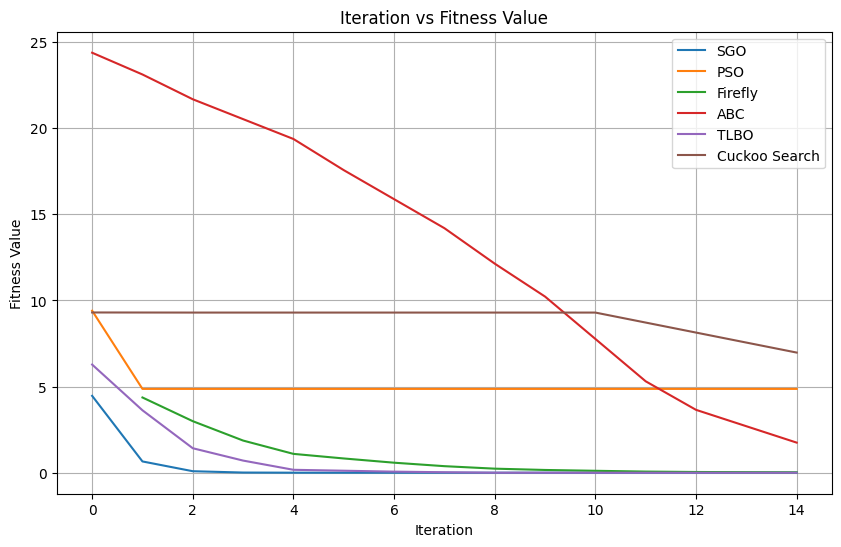

In [11]:
# || COMPARISON GRAPH ||

iterations = list(range(itr + 1))

def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 7

smoothed_SGO = moving_average(fitness_values_SGO, window_size)
smoothed_PSO = moving_average(fitness_values_PSO, window_size)
smoothed_FIREFLY = moving_average(fitness_values_FIREFLY, window_size)
smoothed_ABC = moving_average(fitness_values_ABC, window_size)
smoothed_TLBO = moving_average(fitness_values_TLBO, window_size)
smoothed_CuckooSearch = moving_average(fitness_values_CuckooSearch, window_size)

smoothed_iterations = iterations[:len(smoothed_SGO)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(smoothed_iterations, smoothed_SGO, label='SGO')
plt.plot(smoothed_iterations, smoothed_PSO, label='PSO')
plt.plot(smoothed_iterations, smoothed_FIREFLY, label='Firefly')
plt.plot(smoothed_iterations, smoothed_ABC, label='ABC')
plt.plot(smoothed_iterations, smoothed_TLBO, label='TLBO')
plt.plot(smoothed_iterations, smoothed_CuckooSearch, label='Cuckoo Search')

plt.title('Iteration vs Fitness Value')
plt.xlabel('Iteration')
plt.ylabel('Fitness Value')
plt.legend()
plt.grid(True)
plt.show()